# 패키지 구성
    
* hive -  pyhive wrapper, 쿼리, csv, excel 저장 등 사용
* presto - beta
* Date -  날짜 생성  LTAS 등 파티션 날짜 바꿀때 유용
* Job - 작업 시간 조정 (예약, 등)
   
    
   

# Hive 
* hive.sql(sql,retry = 1) --취소시 쿼리 자동 kill
* hive.create_table(table_name,columns = None,partitions = None,storage_type = 'ORC',drop  = False)
* hive.to_excel(sql,wb = None,sheet_name='Sheet',fname = str(int(time.time()))+'.xlsx',hold = False)
* hive.to_csv(sql,fname = str(int(time.time()))+'.csv',delimiter='\t', quoting = False,header = False)
* hive.to_sql(sql,repl="target:tag")

In [14]:
import MyHiveConnector
print(Presto.__doc__)

프레스토 커넥터


In [6]:
#print(hive.create_table.__doc__)
#print(hive.to_excel.__doc__)
#print(hive.to_csv.__doc__)
#print(hive.to_sql.__doc__)


		text : BDAP 에서 돌아가는 쿼리들 ; 분리 그대로 
			ETL_YMD, BASE_YM, BASE_DATE 형식 감지 (오류 있을수 있음)
		retry: sql() 에서 재시도할 횟수 

		


In [2]:
#드랍하고 default 스키마 kys_test 테이블 생성
#a,b,c,d 스트링 타입 컬럼, d  int 타입, e 더블타입
hive.create_table('default.kys_test',columns ='a,b,c,d int,e double',drop = True)
#dryrun -> 쿼리만 생성 
hive.create_table('default.kys_test',columns ='a,b,c,d int,e double',dry_run = True)

In [4]:
#방금 생성한 테이블
hive.sql('desc default.kys_test')

[('a', 'string', ''),
 ('b', 'string', ''),
 ('c', 'string', ''),
 ('d', 'int', ''),
 ('e', 'double', '')]

In [6]:
#데이터 넣기
hive.sql("insert into default.kys_test select 'a','b','c',4,5")

In [8]:
#셀렉트 example 
data = hive.sql('select * from default.kys_test')
# 실패시 retry 만큼 실행 --> return code 1,2,3 시 join option 변경하고 5분 뒤 자동실행
data = hive.sql('select * from default.kys_test', retry = 3)

#pandas df 로 변환
df = pd.DataFrame(data,columns = myhive.field_names)
df.head()

,a,b,c,d,e
0,a,b,c,4,5.0


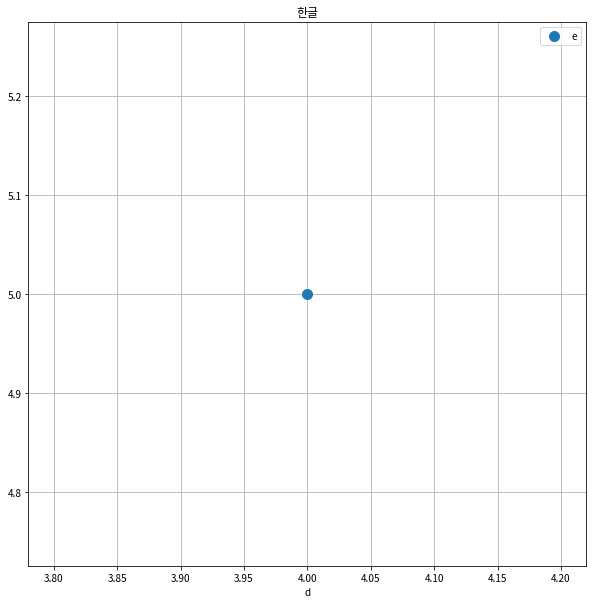

In [17]:
df.plot('d','e', figsize = (10,10),grid = True,title = '한글',style = 'o',markersize = 10)

In [ ]:
#hive.to_excel(sql,wb = None,sheet_name='Sheet',fname = str(int(time.time()))+'.xlsx',hold = False)
#엑셀 생성 - 주피터노트북에 있음
hive.to_excel('select * from default.kys_test')

#시트명,파일명 변경 후 생성 
hive.to_excel('select * from default.kys_test',sheet_name = 'test',fname = 'testfile.xlsx')

#시트 여러개 생성하기
wb = hive.to_excel('select * from default.kys_test',sheet_name = '1번시트',hold = True)
hive.to_excel('select * from default.kys_test',wb = wb,sheet_name = '2번시트',fname = '여러시트.xlsx')




In [ ]:
#hive.to_csv(sql,fname = str(int(time.time()))+'.csv',delimiter='\t', quoting = False,header = False)
#탭 분리된 csv (기본값)
hive.to_csv('select * from default.kys_test')

#헤어포함,탭분리
hive.to_csv('select * from default.kys_test',header = True)

#딜리미터 변경
hive.to_csv('select * from default.kys_test',header = True,delimiter = ',')

#모든 값 쉼표 처리 - "a","b","c","4","5.0"
hive.to_csv('select * from default.kys_test',delimiter = ',',quoting = True)



In [ ]:
# 자동변환 예제 8자리--> ETLYMD

sql = """select * from table where date = '20190101' ;
         create table default.test as select 1;"""
hive.to_sql(sql)

In [1]:
# 수동변환 예제 8자리--> ETLYMD

sql = """select * from table where date = '20190101' ;
         create table default.test as select 1;
         select 1 where base_ym = 201908;"""
hive.to_sql(sql,repl="201908:BASE_YM")

#파티션 쓰는 경우 repl 변수 활용, 예)  20190101:ETL_YMD|201901:ETL_YM
#==================Variables======================
BASE_YM =
#==================Python SQL======================
sql = """select * from table where date = '20190101' """
myhive.sql(sql,retry = 3)

sql = """create table default.test as select 1 """
myhive.sql(sql,retry = 3)

sql = """select 1 where base_ym = {BASE_YM} """.format(BASE_YM = base_ym)
myhive.sql(sql,retry = 3)



# Date
* Date.between(시작,처음)
* Date.add(시작,일수)
* Date.subtract(시작,일수)
* Date.month_diff(시작,차이)
* Date.last_day(YYYYMM)
* Date.first_datyYYYYMM)
* Date.get_dow(YYYYMMDD) - 요일

In [1]:
Date.between(20200225,20200303)

['20200225',
 '20200226',
 '20200227',
 '20200228',
 '20200229',
 '20200301',
 '20200302',
 '20200303']

In [4]:
Date.add(20181031,1)

'20181101'

In [21]:
Date.subtract(20190101,1)

'20181231'

In [22]:
Date.month_diff(201801,13)

'201902'

In [24]:
Date.last_day(202002)

'20200229'

In [26]:
Date.first_day(201801)

'20180101'

In [27]:
Date.get_dow(20200229)

'토'

# Job
* start_at(ts, fmt = '%Y-%m-%d %H:%M:%S')
* wait_about(hr)
* pause_between(start_hr, end_hr)

In [28]:
#2019년 1월 1일 시작
Job.start_at('2019-01-01 00:00:00')

Job starts at 2019-01-01 00:00:00
605:24:24 left


KeyboardInterrupt: 

In [ ]:
#8시간 후 시작
Job.wait_about(8)

In [ ]:
#23시부터 새벽 2시에는 작업 중지
Job.pause_between(23,2)

# myhive 와 Date 사용 template

try, except 문을 써야 특정날짜 오류에도 나머지를 돌릴수 있음

예 20181001 오류나도 20181002 실행

In [2]:

for date in Date.between(20181001,20181002):
    Job.pause_between(23,2)
    try:
        sql = """select * from some_table where partition = '{D}'""".format(D= date)
        print(sql)
        #myhive.sql(sql)
    except Exception as e:
        print(e)


select * from some_table where partition = '20181001'
select * from some_table where partition = '20181002'


In [2]:
presto

NameError: name 'presto' is not defined